<a href="https://colab.research.google.com/github/danieloselu3/Rhino-Africa-Data-Analytics/blob/main/RhinoAfrica_data_Analyst_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rhino Africa Data Analysis

The aim of this assignment is for me to evaluate my ability to utilize data and to create insightful and accurate reporting by utilizing data analytics tools. Ultimately, this will provide a summary of my ability to use data to deliver actionable and accurate insights that can be useful to a data-driven decision-making organization.

In [ ]:
# imports
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt

In [ ]:
# add a path to the excel file
file_path = './assessment_data.xlsx'

# Load the Excel file into a dictionary of dataframes
xls = pd.ExcelFile(file_path)

# Access individual sheets by their names
fact_transaction = pd.read_excel(xls, 'fact_transaction')
dim_advertising_cost = pd.read_excel(xls, 'dim_advertising_cost')
dim_travel_destination = pd.read_excel(xls, 'dim_travel_destination')
dim_consultant = pd.read_excel(xls, 'dim_consultant')
dim_customer = pd.read_excel(xls, 'dim_customer')
dim_campaign = pd.read_excel(xls, 'dim_campaign')
dim_channel = pd.read_excel(xls, 'dim_channel')
dim_location = pd.read_excel(xls, 'dim_location')
dim_brand = pd.read_excel(xls, 'dim_brand')


## Data Cleaning

We did an Analysis on the datasets from the excel sheet to see if anyof the data sets needed some data cleaning before we proceed. Of the datasets available, consistensies where found in **dim_advertising_cost**.

The data cleaning that was done included:

- Duplicates for id 15, **were we saw channel_id 4, that seems incorrect**, as dim_channel only contains 3 channel IDs(1,2and 3). This we concluded was an error and thus **this row was deleted**.

- Inconsistent date format for id 22, **where we found the value 2020-\08-01**, which is not the date format used accross and so this **was changed  to 01/08/2021**.

- Typing error for id 37, where we had **250h0000**, we **changed this to 2500000 by removing the 'h'**, and this made sense as it conformed to the values for 01/02/2021 and 01/03/2021.

- Missing date for id 52, which we filled with 01/06/2021

- There also seemed to be some **issues with id 58 and 59**, as the advert cost for channel 1 was missing while that of channel 2 was present. Channel 2 is however non-paying, and hence **it made sense to switch this amount to channel 1**.

Moving forward, we'll look at the datatypes of the columns in eact table to see if they match the dataset they contain.

### 1. channel dimension

In [ ]:
# check for the top records
dim_channel.head()

,id,channel,created_at,updated_at
0,1,Paid,2019-05-12,2019-05-12
1,2,Non-Paid,2018-11-11,2018-11-11
2,3,Offline,2018-02-11,2018-02-11


In [ ]:
# overview of the column datatypes
dim_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3 non-null      int64         
 1   channel     3 non-null      object        
 2   created_at  3 non-null      datetime64[ns]
 3   updated_at  3 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 228.0+ bytes


From the above output, we can see that datatypes in channel are assigned correctly and no cleaning will be needed

### 2. brand dimension

In [ ]:
# check for the high level overview of columns
dim_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          9 non-null      int64         
 1   brand       9 non-null      object        
 2   created_at  9 non-null      datetime64[ns]
 3   updated_at  9 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 420.0+ bytes


In [ ]:
# top 5 values on the table
dim_brand.head(5)

,id,brand,created_at,updated_at
0,1,RAS,2018-02-14,2018-02-14
1,2,O2A,2018-09-08,2018-09-08
2,3,IC,2019-09-15,2019-09-15
3,4,EH,2019-09-01,2019-09-01
4,5,CH,2018-10-03,2018-10-03


From the analysis, values in brand dimension seem to have the datatypes assigned correctly

### 3. campaign dimension

In [ ]:
# high level overview of the columns
dim_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7 non-null      int64         
 1   campaign_name  7 non-null      object        
 2   created_at     7 non-null      datetime64[ns]
 3   updated_at     7 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 356.0+ bytes


In [ ]:
# a look into some sample values
dim_campaign.head(5)

,id,campaign_name,created_at,updated_at
0,1,PMAX_supplier,2019-05-12,2019-05-12
1,2,PMAX_brands,2018-11-11,2018-11-11
2,3,PMAX_shopping,2018-02-11,2018-02-11
3,4,BDay_supplier,2019-07-25,2019-07-25
4,5,Destination_Kruger Park,2018-01-18,2018-01-18


From the above overview, the datatypes in Campaign seem to be assigned properly

### 4. Location dimension

In [ ]:
# high level column overview
dim_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          66 non-null     int64         
 1   region      66 non-null     object        
 2   country     66 non-null     object        
 3   created_at  66 non-null     datetime64[ns]
 4   updated_at  66 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 2.7+ KB


From the info on the table columns, we can see that the columns have the right datatypes.

In [ ]:
# a look into the top 5 values in the dataset
dim_location.head()

,id,region,country,created_at,updated_at
0,1,Africa,Angola,2018-05-10,2018-05-10
1,2,Latam,Argentina,2019-08-07,2019-08-07
2,3,Australasia,Australia,2018-06-13,2018-06-13
3,4,Europe,Austria,2019-01-19,2019-01-19
4,5,Europe,Belgium,2019-10-02,2019-10-02


### 5. advertising cost dimension

In [ ]:
# high overview of the table
dim_advertising_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                72 non-null     int64         
 1   date              72 non-null     datetime64[ns]
 2   channel_id        72 non-null     int64         
 3   advertising_cost  72 non-null     int64         
 4   created_at        72 non-null     object        
 5   updated_at        72 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ KB


From the above output, we can see that some data types are not consistent with the value contained in the column, **created_at** and **updated_at** are timestamp columns but the datatype is object, this will need to be adjusted.

In [ ]:
# Convert the 3 columns to datetime
date_columns = ['created_at', 'updated_at']

for column in date_columns:
    dim_advertising_cost[column] = pd.to_datetime(dim_advertising_cost[column])

In [ ]:
# Confirm the datatypes of the columns
dim_advertising_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                72 non-null     int64         
 1   date              72 non-null     datetime64[ns]
 2   channel_id        72 non-null     int64         
 3   advertising_cost  72 non-null     int64         
 4   created_at        72 non-null     datetime64[ns]
 5   updated_at        72 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(3)
memory usage: 3.5 KB


### 6. fact transaction

In [ ]:
# high level column overview
fact_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     10000 non-null  int64         
 1   date                   10000 non-null  datetime64[ns]
 2   transaction_id         10000 non-null  int64         
 3   brand_id               10000 non-null  int64         
 4   location_id            10000 non-null  int64         
 5   channel_id             10000 non-null  int64         
 6   campaign_id            10000 non-null  int64         
 7   keyword                10000 non-null  object        
 8   customer_id            10000 non-null  int64         
 9   consultant_id          10000 non-null  int64         
 10  travel_destination_id  10000 non-null  int64         
 11  revenue_incl_VAT       10000 non-null  float64       
 12  revenue_excl_VAT       10000 non-null  float64       
 13  co

In [ ]:
# high level record overview
fact_transaction.head()

,id,date,transaction_id,brand_id,location_id,channel_id,campaign_id,keyword,customer_id,consultant_id,travel_destination_id,revenue_incl_VAT,revenue_excl_VAT,cost_to_supplier,created_at,updated_at
0,1,2021-05-05,105694821,4,47,2,5,(not set),10288,101,21,184844.70,160734.521739,184844.70,2021-05-05,2021-05-03
1,2,2021-02-21,105694822,8,40,2,4,(not provided),10114,141,13,247200.00,214956.521739,197760.00,2021-02-21,2021-02-25
2,3,2021-07-11,105694823,6,33,3,6,(not provided),10318,148,18,294393.75,255994.565217,176636.25,2021-07-11,2021-07-06
3,4,2020-05-05,105694824,4,43,2,7,(not provided),10270,113,18,233949.24,203434.121739,233949.24,2020-05-05,2020-05-09
4,5,2020-10-12,105694825,3,55,3,5,(not provided),10397,142,16,135771.30,118062.000000,122194.17,2020-10-12,2020-10-16


The fact seems to contain all the columns in the right format as well.

### 7. dim travel destination

In [ ]:
# high level column overview
dim_travel_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  25 non-null     int64         
 1   travel_destination  25 non-null     object        
 2   created_at          25 non-null     datetime64[ns]
 3   updated_at          25 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 932.0+ bytes


In [ ]:
# high level record overview
dim_travel_destination.head()

,id,travel_destination,created_at,updated_at
0,1,Gauteng,2019-10-28,2019-10-28
1,2,Greater Kruger Area,2018-11-04,2018-11-04
2,3,Namib Desert,2019-08-25,2019-08-25
3,4,Central Namibia,2019-06-29,2019-06-29
4,5,Damaraland,2018-02-20,2018-02-20


### 8. dim consultant

In [ ]:
# high level column overview
dim_consultant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               50 non-null     int64         
 1   consultant_name  50 non-null     object        
 2   created_at       50 non-null     datetime64[ns]
 3   updated_at       50 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
# high level records overview
dim_consultant.head()

,id,consultant_name,created_at,updated_at
0,101,Kerwinn,2018-07-09,2018-07-09
1,102,Ferdinand,2019-06-08,2019-06-08
2,103,Tadio,2019-11-29,2019-11-29
3,104,Matthew,2018-05-09,2018-05-09
4,105,Barry,2018-07-02,2018-07-02


### 9. dim customer

In [ ]:
# high level column overview
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             479 non-null    int64         
 1   customer_name  479 non-null    object        
 2   created_at     479 non-null    datetime64[ns]
 3   updated_at     479 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 15.1+ KB


In [ ]:
# high level records overview
dim_customer.head()

,id,customer_name,created_at,updated_at
0,10001,Bendicty,2018-12-12,2018-12-12
1,10002,Ursulina,2019-11-17,2019-11-17
2,10003,Cymbre,2018-11-01,2018-11-01
3,10004,Wilek,2018-10-18,2018-10-18
4,10005,Desiree,2019-04-23,2019-04-23


Dimensional Data Model

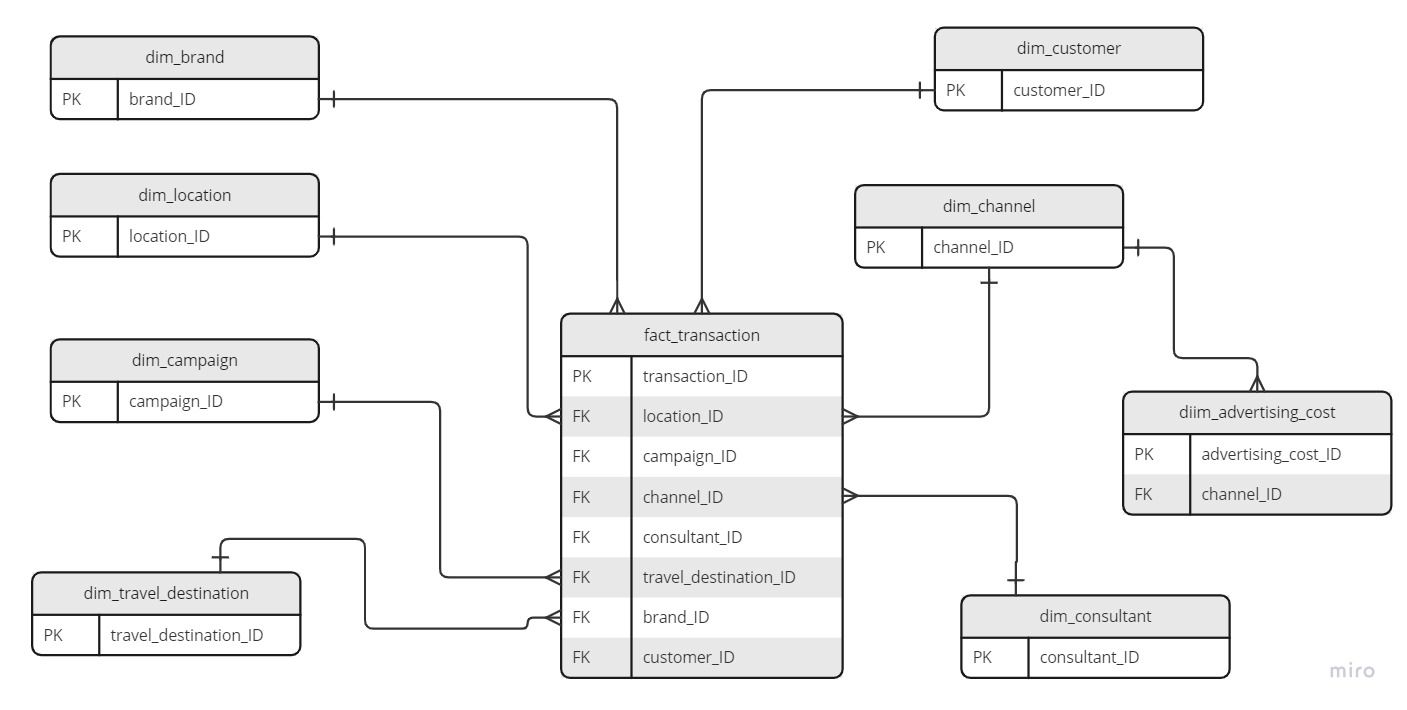

## Data Analysis

Now that we've gone through all the tables and the data is cleaned, we will create a SQL query to combine the data set for our analysis, and have they data model as shown above

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT *
FROM fact_transaction t1
JOIN dim_brand t2 ON t1.brand_id = t2.id
JOIN dim_location t3 ON t1.location_id = t3.id
JOIN dim_channel t4 ON t1.channel_id = t4.id
JOIN dim_campaign t5 ON t1.campaign_id = t5.id
JOIN dim_customer t6 ON t1.customer_id = t6.id
JOIN dim_consultant t7 ON t1.consultant_id = t7.id
JOIN dim_travel_destination t8 ON t1.travel_destination_id = t8.id
"""

# The Query result
result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(result)
result.head(5)

,id,date,transaction_id,brand_id,location_id,channel_id,campaign_id,keyword,customer_id,consultant_id,...,created_at,updated_at,id,consultant_name,created_at,updated_at,id,travel_destination,created_at,updated_at
0,1,2021-05-05 00:00:00.000000,105694821,4,47,2,5,(not set),10288,101,...,2018-03-22 00:00:00.000000,2018-03-22 00:00:00.000000,101,Kerwinn,2018-07-09 00:00:00.000000,2018-07-09 00:00:00.000000,21,Etosha,2019-07-27 00:00:00.000000,2019-07-27 00:00:00.000000
1,2,2021-02-21 00:00:00.000000,105694822,8,40,2,4,(not provided),10114,141,...,2019-11-16 00:00:00.000000,2019-11-16 00:00:00.000000,141,Weston,2019-09-01 00:00:00.000000,2019-09-01 00:00:00.000000,13,The Northern Cape,2018-12-05 00:00:00.000000,2018-12-05 00:00:00.000000
2,3,2021-07-11 00:00:00.000000,105694823,6,33,3,6,(not provided),10318,148,...,2018-03-24 00:00:00.000000,2018-03-24 00:00:00.000000,148,Glyn,2019-12-03 00:00:00.000000,2019-12-03 00:00:00.000000,18,Serengeti and the north of Tanzania,2018-02-14 00:00:00.000000,2018-02-14 00:00:00.000000
3,4,2020-05-05 00:00:00.000000,105694824,4,43,2,7,(not provided),10270,113,...,2019-03-30 00:00:00.000000,2019-03-30 00:00:00.000000,113,Malinde,2019-03-18 00:00:00.000000,2019-03-18 00:00:00.000000,18,Serengeti and the north of Tanzania,2018-02-14 00:00:00.000000,2018-02-14 00:00:00.000000
4,5,2020-10-12 00:00:00.000000,105694825,3,55,3,5,(not provided),10397,142,...,2018-04-10 00:00:00.000000,2018-04-10 00:00:00.000000,142,Sapphira,2019-11-24 00:00:00.000000,2019-11-24 00:00:00.000000,16,Sun City & Surrounds,2019-06-07 00:00:00.000000,2019-06-07 00:00:00.000000


Now that we've combined our data, we'll export it to our excelsheet before we continue

In [ ]:
# file path to save the data
file_path = './assessment_data1.xlsx'

# Save the DataFrame to an Excel sheet named 'fact_transaction_combined_data' in the file
result.to_excel(file_path, sheet_name='fact_transaction_combined_data', index=False)


### Assessment

#### Question 1
Create a SQL script that generates a dataset containing the summarized
monthly revenue (incl. and excl. VAT fields separately) and cost to supplier,
split by channel (not channel_id, the value describing the key channel_id).

The output should have fields for: year, month, channel (not channel_id),
revenue incl VAT, revenue excl VAT & cost to supplier.

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    strftime('%m', date) AS month,
    channel,
    SUM(revenue_incl_VAT) AS revenue_incl_VAT,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT,
    SUM(cost_to_supplier) AS cost_to_supplier
FROM
    result
GROUP BY
    year,month,channel
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,month,channel,revenue_incl_VAT,revenue_excl_VAT,cost_to_supplier
0,2020,01,Non-Paid,21798208.60,1.895496e+07,1.434181e+07
1,2020,01,Offline,26751742.50,2.326238e+07,1.753180e+07
2,2020,01,Paid,22902269.60,1.991502e+07,1.729920e+07
3,2020,02,Non-Paid,23450832.30,2.039203e+07,1.772935e+07
4,2020,02,Offline,21980290.50,1.911330e+07,1.525447e+07
...,...,...,...,...,...,...
67,2021,11,Offline,39630172.05,3.446102e+07,2.907622e+07
68,2021,11,Paid,42854752.35,3.726500e+07,3.020499e+07
69,2021,12,Non-Paid,24820556.25,2.158309e+07,1.690558e+07
70,2021,12,Offline,25992444.75,2.260213e+07,1.772575e+07


We now export our dataset to excel

In [ ]:
# file path to save the data
file_path = './assessment_data2.xlsx'

# Save the DataFrame to an Excel sheet named 'fact_transaction_combined_data' in the file
query_result.to_excel(file_path, sheet_name='q1_result_data', index=False)

#### Question 2
Create a SQL script that generates a dataset containing the following fields:
date, transaction_id,brand (not brand_id, the value describing the key
brand_id), region, country, channel, campaign_name,consultant_name,
customer_name, travel_destination, revenue_excl & cost_to_supplier.

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    date,
    transaction_id,
    brand,
    region,
    country,
    channel,
    campaign_name,
    consultant_name,
    customer_name,
    travel_destination,
    revenue_excl_VAT,
    cost_to_supplier
FROM
    result
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result.head(5)

,date,transaction_id,brand,region,country,channel,campaign_name,consultant_name,customer_name,travel_destination,revenue_excl_VAT,cost_to_supplier
0,2021-05-05 00:00:00.000000,105694821,EH,Asia,Rep of Korea,Non-Paid,Destination_Kruger Park,Kerwinn,Alfons,Etosha,160734.521739,184844.70
1,2021-02-21 00:00:00.000000,105694822,RC,Asia,Other,Non-Paid,BDay_supplier,Weston,Ardys,The Northern Cape,214956.521739,197760.00
2,2021-07-11 00:00:00.000000,105694823,SS,Africa,Namibia,Offline,Destination_Garden_Route,Glyn,Maisey,Serengeti and the north of Tanzania,255994.565217,176636.25
3,2020-05-05 00:00:00.000000,105694824,EH,Middle East,Other,Non-Paid,Destination_Madagascar,Malinde,Torrance,Serengeti and the north of Tanzania,203434.121739,233949.24
4,2020-10-12 00:00:00.000000,105694825,IC,Europe,Switzerland,Offline,Destination_Kruger Park,Sapphira,Jamaal,Sun City & Surrounds,118062.000000,122194.17


In [ ]:
# file path to save the data
file_path = './assessment_data3.xlsx'

# Save the DataFrame to an Excel sheet named 'fact_transaction_combined_data' in the file
query_result.to_excel(file_path, sheet_name='q2_result_data', index=False)

#### Question 3
Develop 2 simple table views displaying revenue (VAT exclusive) by region
only, and by region & country, split by year.

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    region,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    region, year
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,region,revenue_excl_VAT
0,2020,Africa,2.129254e+08
1,2021,Africa,2.619156e+08
2,2020,Asia,1.319976e+08
3,2021,Asia,1.775608e+08
4,2020,Australasia,3.365643e+07
5,2021,Australasia,4.961240e+07
6,2020,Europe,2.381234e+08
7,2021,Europe,3.161325e+08
8,2020,Indian Ocean,2.268035e+07
9,2021,Indian Ocean,3.485660e+07


In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    country,
    region,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    country,region, year
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,country,region,revenue_excl_VAT
0,2020,Angola,Africa,1.493956e+07
1,2021,Angola,Africa,1.258560e+07
2,2020,Argentina,Latam,1.036018e+07
3,2021,Argentina,Latam,1.158592e+07
4,2020,Australia,Australasia,9.588939e+06
...,...,...,...,...
127,2021,Venezuela,Latam,1.642391e+07
128,2020,Zambia,Africa,1.440243e+07
129,2021,Zambia,Africa,1.386218e+07
130,2020,Zimbabwe,Africa,1.451389e+07


#### Question 4
How much revenue was generated from the Middle Eastern region in 2020?

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    region,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    region, year
HAVING region ='Middle East' AND year='2020'
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,region,revenue_excl_VAT
0,2020,Middle East,6.518306e+07


#### Question 5
How much revenue was generated by Germany in 2021?

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    country,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    country, year
HAVING country ='Germany' AND year='2021'
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,country,revenue_excl_VAT
0,2021,Germany,1.491312e+07


#### Question 6
What % of revenue from the European region was generated by France
across both 2020 and 2021?

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    (SUM(revenue_excl_VAT) / (SELECT SUM(revenue_excl_VAT) FROM result WHERE region = 'Europe')) * 100 AS percentage_of_revenue
FROM
    result
WHERE
    region = 'Europe' AND country = 'France';
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,percentage_of_revenue
0,5.11191


#### Question 7
What was the % growth or decline in revenue generated by Egypt from 2020
to 2021?

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    country,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    country, year
HAVING country ='Egypt'
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,country,revenue_excl_VAT
0,2020,Egypt,1.178542e+07
1,2021,Egypt,1.488850e+07


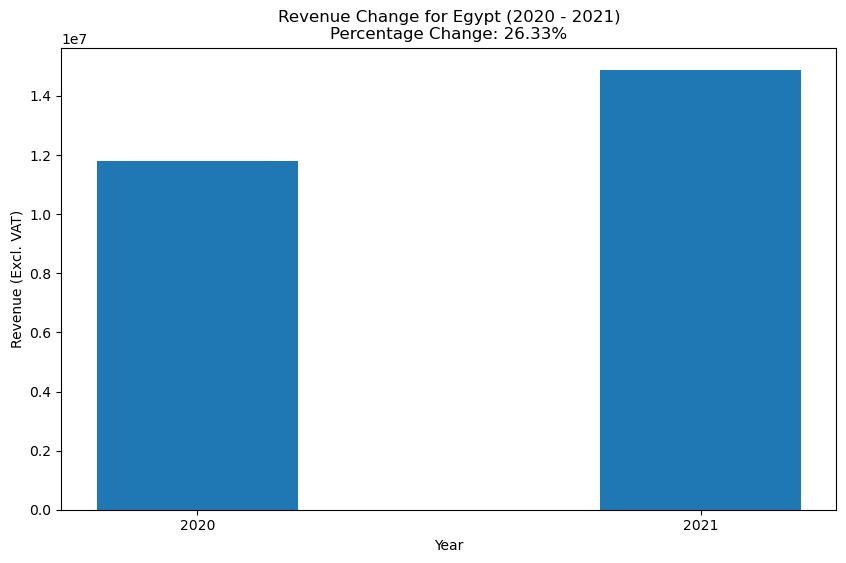

In [ ]:
# Calculate the percentage change in revenue
percentage_change = ((query_result['revenue_excl_VAT'].iloc[-1] - query_result['revenue_excl_VAT'].iloc[0]) / query_result['revenue_excl_VAT'].iloc[0]) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(query_result['year'], query_result['revenue_excl_VAT'], width=0.4)
plt.xlabel('Year')
plt.ylabel('Revenue (Excl. VAT)')
plt.title(f'Revenue Change for {query_result.iloc[0]["country"]} ({query_result.iloc[0]["year"]} - {query_result.iloc[1]["year"]})\nPercentage Change: {percentage_change:.2f}%')
plt.xticks(query_result['year'])
plt.show()

#### Question 9

Calculate the % growth or decline for each region between 2020 and 2021

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    region,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    region, year
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,region,revenue_excl_VAT
0,2020,Africa,2.129254e+08
1,2021,Africa,2.619156e+08
2,2020,Asia,1.319976e+08
3,2021,Asia,1.775608e+08
4,2020,Australasia,3.365643e+07
5,2021,Australasia,4.961240e+07
6,2020,Europe,2.381234e+08
7,2021,Europe,3.161325e+08
8,2020,Indian Ocean,2.268035e+07
9,2021,Indian Ocean,3.485660e+07


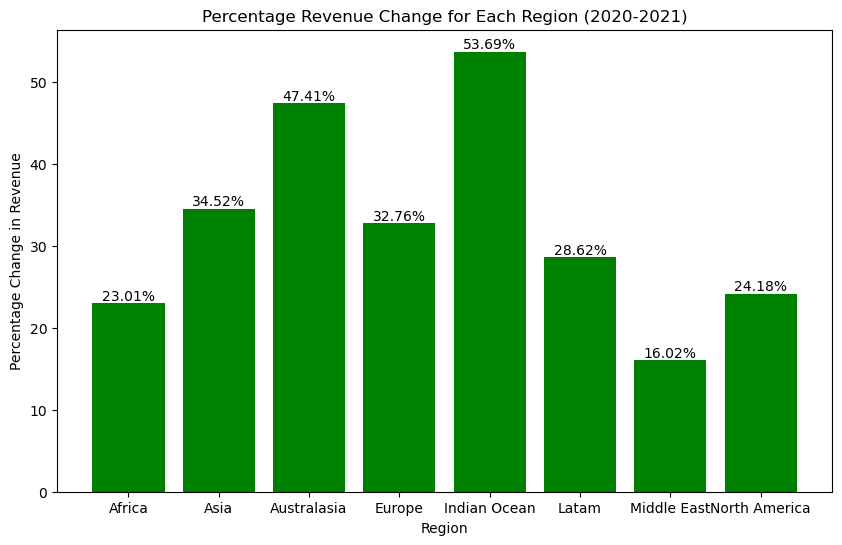

In [ ]:
# Create a DataFrame from the sample data
df = query_result

# Pivot the data to have years as columns and regions as index
pivot_df = df.pivot(index='region', columns='year', values='revenue_excl_VAT')

# Calculate the percentage change in revenue for each region
pivot_df['change_percentage'] = (pivot_df['2021'] - pivot_df['2020']) / pivot_df['2020'] * 100

# Create a bar chart with colors indicating growth or decline
colors = ['g' if change >= 0 else 'r' for change in pivot_df['change_percentage']]

plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_df.index, pivot_df['change_percentage'], color=colors)
plt.xlabel('Region')
plt.ylabel('Percentage Change in Revenue')
plt.title('Percentage Revenue Change for Each Region (2020-2021)')

# Add percentage labels on top of each bar
for bar, label in zip(bars, pivot_df['change_percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, label, f'{label:.2f}%', ha='center', va='bottom')


plt.show()

#### Question 10
What is the French growth rank in relation to all countries’ revenue excl VAT
growth rates between 2020 and 2021?

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    country,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM
    result
GROUP BY
    country, year
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,country,revenue_excl_VAT
0,2020,Angola,1.493956e+07
1,2021,Angola,1.258560e+07
2,2020,Argentina,1.036018e+07
3,2021,Argentina,1.158592e+07
4,2020,Australia,9.588939e+06
...,...,...,...
117,2021,Venezuela,1.642391e+07
118,2020,Zambia,1.440243e+07
119,2021,Zambia,1.386218e+07
120,2020,Zimbabwe,1.451389e+07


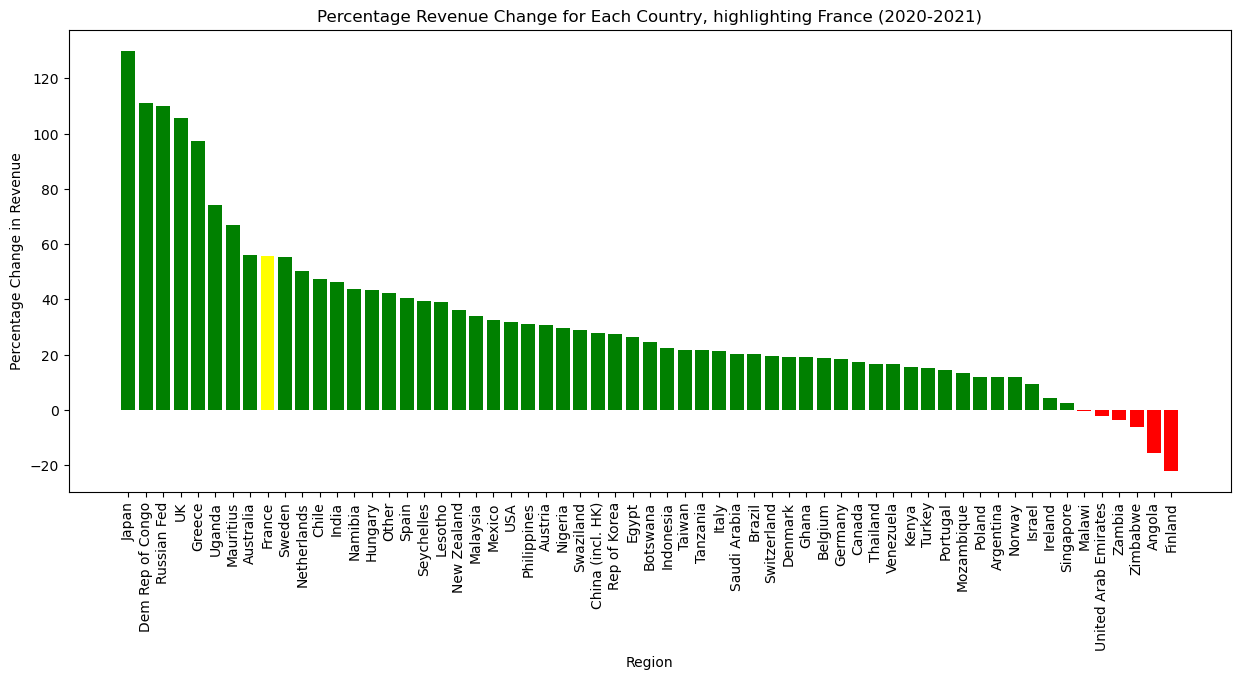

In [ ]:
# Create a DataFrame from the sample data
df = query_result

# Pivot the data to have years as columns and regions as index
pivot_df = df.pivot(index='country', columns='year', values='revenue_excl_VAT')

# Calculate the percentage change in revenue for each region
pivot_df['change_percentage'] = (pivot_df['2021'] - pivot_df['2020']) / pivot_df['2020'] * 100

# Sort the data by the highest change in revenue (percentage change)
pivot_df = pivot_df.sort_values(by='change_percentage', ascending=False)

# Define colors for bars based on revenue change, highlight France in yellow
colors = ['yellow' if country == 'France' else ('g' if change >= 0 else 'r') for country, change in zip(pivot_df.index, pivot_df['change_percentage'])]

plt.figure(figsize=(15, 6))
bars = plt.bar(pivot_df.index, pivot_df['change_percentage'], color=colors)
plt.xlabel('Country')
plt.ylabel('Percentage Change in Revenue')
plt.title('Percentage Revenue Change for Each Country, highlighting France (2020-2021)')

plt.xticks(rotation=90)

plt.show()

#### Question 11
Which was the fastest growing country in % revenue excl VAT growth
between 2020 and 2021?

**From the previous visual, we can see that Japan in the fastest growing country in Revenue Percentage**

#### Question 12

Which region represents the 3rd largest market in 2020?

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    region,
    SUM(revenue_excl_VAT) AS total_revenue
FROM result
WHERE year = '2020'
GROUP BY region
ORDER BY total_revenue DESC
LIMIT 1 OFFSET 2;
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,region,total_revenue
0,2020,Asia,1.319976e+08


#### Question 13
Create 3 line chart visuals, one per channel, that displays the revenue excl
VAT split by year, i.e. each chart must have 2 lines, using month as the
x-axes.

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    strftime('%m', date) AS month,
    channel,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM result
GROUP BY year, month,channel
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,month,channel,revenue_excl_VAT
0,2020,01,Non-Paid,1.895496e+07
1,2020,01,Offline,2.326238e+07
2,2020,01,Paid,1.991502e+07
3,2020,02,Non-Paid,2.039203e+07
4,2020,02,Offline,1.911330e+07
...,...,...,...,...
67,2021,11,Offline,3.446102e+07
68,2021,11,Paid,3.726500e+07
69,2021,12,Non-Paid,2.158309e+07
70,2021,12,Offline,2.260213e+07


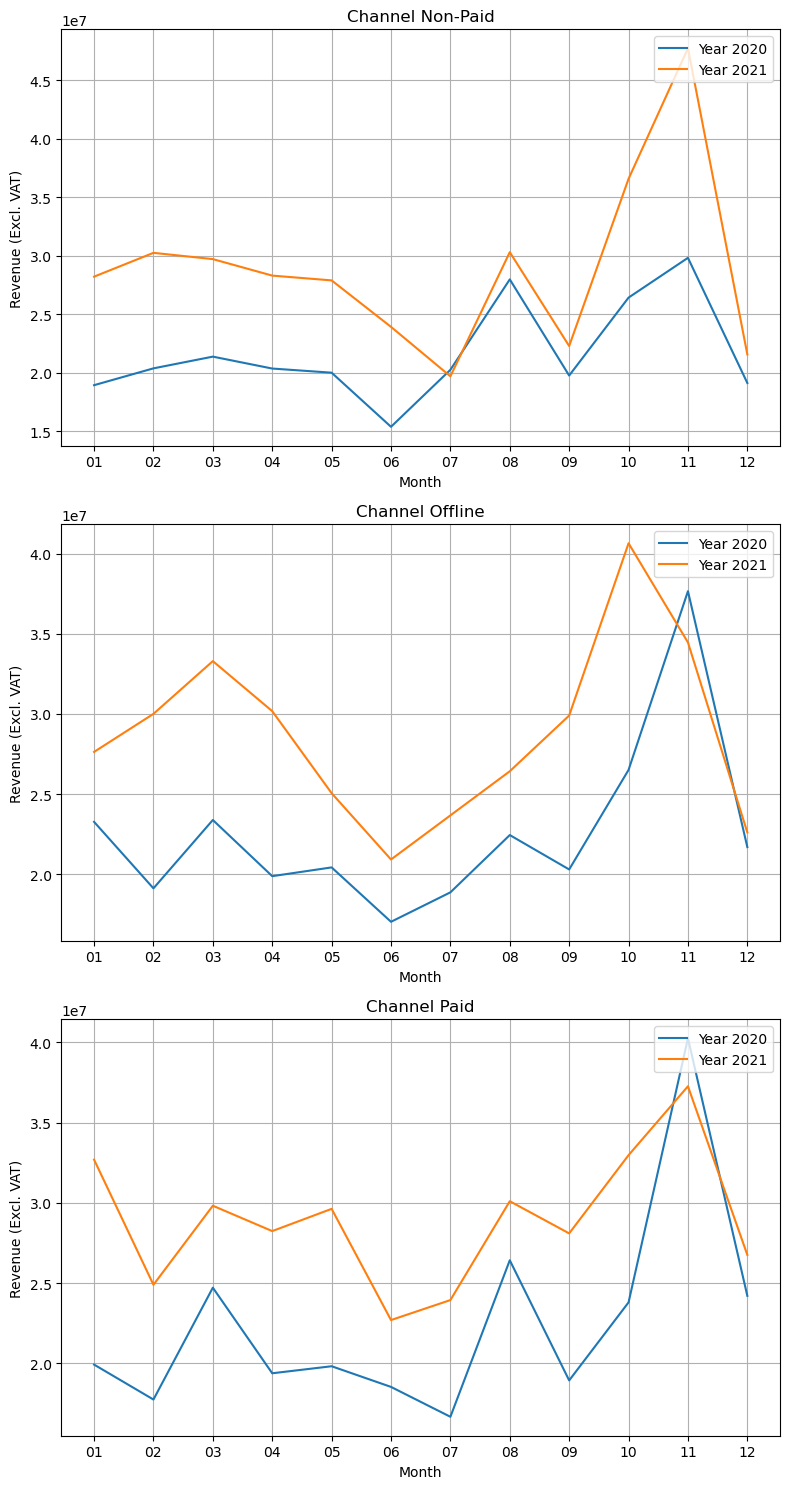

In [ ]:
# Create a DataFrame from the sample data
df = query_result

# Create a figure with subplots for each channel in a vertical arrangement
channels = df['channel'].unique()
fig, axes = plt.subplots(nrows=len(channels), ncols=1, figsize=(8,15))

for i, channel in enumerate(channels):
    channel_data = df[df['channel'] == channel]
    years = channel_data['year'].unique()

    for year in years:
        year_data = channel_data[channel_data['year'] == year]
        axes[i].plot(year_data['month'], year_data['revenue_excl_VAT'], label=f'Year {year}')

    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Revenue (Excl. VAT)')
    axes[i].set_title(f'Channel {channel}')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()

#### Question 14
Create a bar chart visual that shows revenue excl VAT split by year, using
region as x-axes.

In [ ]:
 # Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    region,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM result
GROUP BY region, year
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,region,revenue_excl_VAT
0,2020,Africa,2.129254e+08
1,2021,Africa,2.619156e+08
2,2020,Asia,1.319976e+08
3,2021,Asia,1.775608e+08
4,2020,Australasia,3.365643e+07
5,2021,Australasia,4.961240e+07
6,2020,Europe,2.381234e+08
7,2021,Europe,3.161325e+08
8,2020,Indian Ocean,2.268035e+07
9,2021,Indian Ocean,3.485660e+07


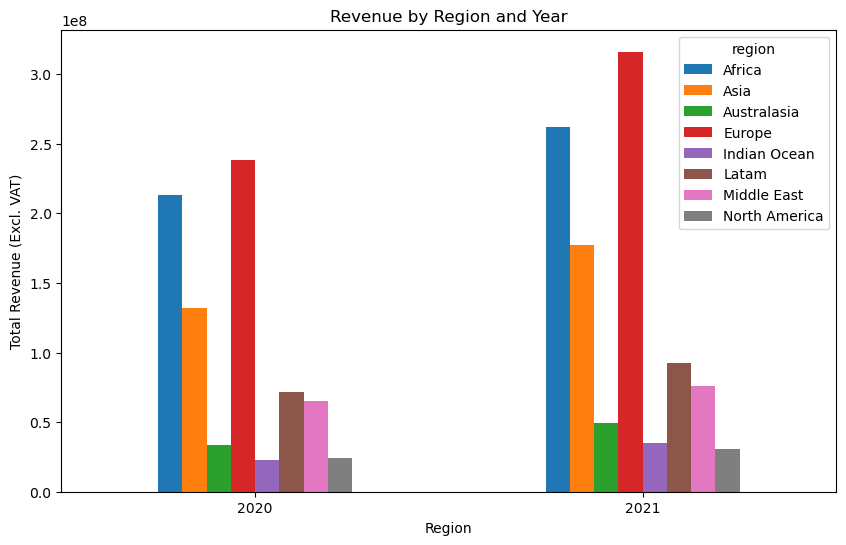

In [ ]:
# Create a DataFrame from the sample data
df = query_result

# Group the data by year and region and calculate the total revenue for each group
grouped = df.groupby(['year', 'region'])['revenue_excl_VAT'].sum().unstack()

# Create a bar chart
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Total Revenue (Excl. VAT)')
plt.title('Revenue by Region and Year')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.show()

#### Question 15
Create a table visual that provides an overview of consultant performance
across the total of 2020 and 2021.

In [ ]:
# Using pandasql to write SQL queries
sql_query = """
SELECT
    strftime('%Y', date) AS year,
    consultant_name,
    SUM(revenue_excl_VAT) AS revenue_excl_VAT
FROM result
GROUP BY consultant_name, year
"""

# The Query result
query_result = ps.sqldf(sql_query, locals())

# Display the result
pd.DataFrame(query_result)
query_result

,year,consultant_name,revenue_excl_VAT
0,2020,Alfonso,1.868222e+07
1,2021,Alfonso,2.244022e+07
2,2020,Alvie,1.359673e+07
3,2021,Alvie,2.128886e+07
4,2020,Barry,1.493190e+07
...,...,...,...
95,2021,Weston,1.856843e+07
96,2020,Williamson,1.304520e+07
97,2021,Williamson,2.265814e+07
98,2020,Yaslene,1.576214e+07
